# UEDS

In [2]:
import os, sys, numpy as np
path = os.getcwd()+"/../../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

In [3]:
tmp_figure_out = os.getcwd()+"/out_put"

In [4]:
import Ensembler
from Ensembler.src.potentials import OneD as pot
from Ensembler import visualisation as vis

from matplotlib import pyplot as plt
%matplotlib inline

## Build System

### Potential

In [9]:
end_states = [pot.harmonicOsc(x_shift=1, fc=12000), pot.harmonicOsc(x_shift=1.5, fc=12000)]
eds_potential = pot.envelopedPotential(V_is=end_states, s=1, Eoff_i=[100,10])


In [6]:
eds_potential.nDim = 2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


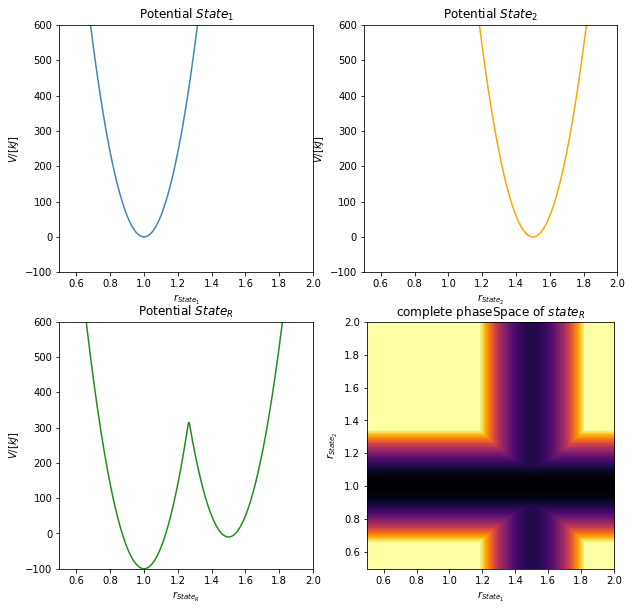

In [5]:
#Visualisation
positions = np.linspace(0.5,2,300)
fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=1)
fig.savefig(tmp_figure_out+"/general_eds_pot.png")

### Integrator

In [7]:
integrator = Ensembler.integrator.metropolisMonteCarloIntegrator(maxStepSize=0.1)
#integrator = Ensembler.integrator.positionVerletIntegrator()

### System

In [10]:
system = Ensembler.system.system(potential=eds_potential, integrator=integrator)

## Simulation

In [16]:
#set Starting Position
system.nDim = 1
system.potential._set_type_check()
system.set_position([[0.4],[1.4]])
system.getCurrentState()

State(position=array([[0.4],
       [1.4]]), temperature=298.0, totEnergy=50.00000000000011, totPotEnergy=50.00000000000011, totKinEnergy=nan, dhdpos=nan, velocity=[[1.1984033168837196, 1.5986144331994494], [1.7134212809132083, 0.6347406370067189]])

In [17]:
#simulate
system.simulate(steps=10000, withdrawTraj=True)

Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%


State(position=array([[0.51272553],
       [1.51272553]]), temperature=298.0, totEnergy=-9.028365777651699, totPotEnergy=-9.028365777651699, totKinEnergy=nan, dhdpos=0.031817338574444576, velocity=None)

## Analysis

In [10]:
#del traj
traj = system.getTrajectory()
traj.columns, traj.shape

(Index(['position', 'temperature', 'totEnergy', 'totPotEnergy', 'totKinEnergy',
        'dhdpos', 'velocity'],
       dtype='object'), (10000, 7))

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

def plotting_1D2State_eds_pot_simulation(system, x_range=None, y_range=None):
    traj = system.getTrajectory()
    eds_potential = system.potential
    
    y_range = [0,2.5]
    x_range= [0,2.5]
    positions = np.linspace(0,2.5,300)
    positions1 = list(map(lambda x: x[0],traj.position))
    positions2 = list(map(lambda x: x[1],traj.position))
    enes1 = eds_potential.V_is[0].ene(np.array(list(map(lambda x: x[0], traj.position))).flat)
    enes2 = eds_potential.V_is[1].ene(np.array(list(map(lambda x: x[1], traj.position))).flat)
    enesR = eds_potential.ene(list(map(lambda x: x, traj.position)))
    fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=0.5)
    
    ax[0].scatter(positions1, enes1)
    ax[0].scatter(positions1[-1], enes1[-1], color="r")
    ax[0].scatter(positions1[0], enes1[0], color="g")

    ax[1].scatter(positions2, enes2)
    ax[1].scatter(positions2[-1], enes2[-1], color="r")
    ax[1].scatter(positions2[0], enes2[0], color="g")

    ax[2].scatter(positions1, enesR)
    ax[2].scatter(positions2, enesR)
    ax[2].scatter(positions1[-1], enesR[-1], color="r")
    ax[2].scatter(positions1[0],  enesR[0], color="g")
    

    ax[-1].scatter(positions2, positions1, alpha=0.4)
    ax[-1].scatter(positions2[-1], positions1[-1], color="r")
    ax[-1].scatter(positions2[0], positions1[0], color="g")

    for x in ax:
        x.set_xlim(x_range)
        
    ax[-1].set_ylim(y_range)
    
    fig.show()

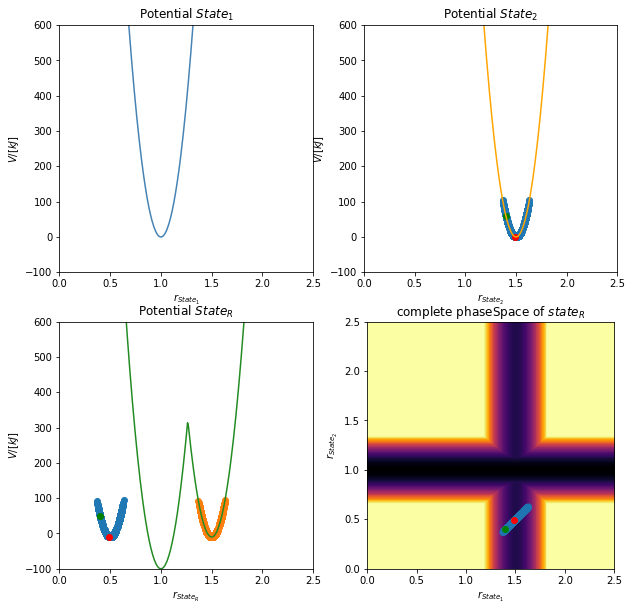

In [12]:
plotting_1D2State_eds_pot_simulation(system)

In [13]:
traj

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,"[[0.4], [1.4]]",298.0,50.000000,50.000000,NaN,NaN,"[-0.1967155927638772, 4.549973353255413]"
1,"[[0.5], [1.5]]",298.0,-10.000000,-10.000000,NaN,0.100000,None
2,"[[0.5032272125378282], [1.503227212537828]]",298.0,-9.937511,-9.937511,NaN,0.003227,None
3,"[[0.5044623714850135], [1.5044623714850134]]",298.0,-9.880523,-9.880523,NaN,0.001235,None
4,"[[0.5261463489186674], [1.5261463489186673]]",298.0,-5.898211,-5.898211,NaN,0.021684,None
5,"[[0.4736145131271361], [1.4736145131271359]]",298.0,-5.822836,-5.822836,NaN,-0.052532,None
6,"[[0.47296346222718744], [1.4729634622271872]]",298.0,-5.614154,-5.614154,NaN,-0.000651,None
7,"[[0.4731259172355289], [1.4731259172355287]]",298.0,-5.666702,-5.666702,NaN,0.000162,None
8,"[[0.49991337138530356], [1.4999133713853032]]",298.0,-9.999955,-9.999955,NaN,0.026787,None
9,"[[0.3999133713853036], [1.3999133713853031]]",298.0,50.103999,50.103999,NaN,-0.100000,None
